In [22]:
import sympy as sym

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.

    xs must be different but not necessarily ordered nor equally spaced.

    Parameters
    ----------
    xs : list[float]
        Points to be interpolated (x-coordinates).
    ys : list[float]
        Points to be interpolated (y-coordinates).

    Returns
    -------
    list[sym.Symbol]
        List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] + [0] * n
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines
"""
xs = [0, 1, 2]
ys = [1, 5, 3]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)
"""


'\nxs = [0, 1, 2]\nys = [1, 5, 3]\nsplines = cubic_spline(xs, ys)\nfor spline in splines:\n    display(spline)\n'

In [25]:
#Ejercicio 1)

In [23]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

In [26]:
#Ejercicio 2)

In [24]:
import sympy as sym
from IPython.display import display

def cubic_spline_clamped(xs: list[float], ys: list[float], fpa: float, fpb: float) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S`` with clamped boundary conditions. Every two points are interpolated by a cubic polynomial
    S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.

    xs must be different but not necessarily ordered nor equally spaced.

    Parameters
    ----------
    xs : list[float]
        Points to be interpolated (x-coordinates).
    ys : list[float]
        Points to be interpolated (y-coordinates).
    fpa : float
        Derivative of the function at the first point (clamped boundary condition).
    fpb : float
        Derivative of the function at the last point (clamped boundary condition).

    Returns
    -------
    list[sym.Symbol]
        List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * (n + 1)
    alpha[0] = 3 * (ys[1] - ys[0]) / h[0] - 3 * fpa
    alpha[n] = 3 * fpb - 3 * (ys[n] - ys[n-1]) / h[n-1]

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] + [0] * n
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[0] = alpha[0] / l[0]
    z[n] = alpha[n] / l[n]
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

# Puntos dados
xs = [-1, 1]
ys = [1, 3]
fpa = 1  # Derivada en el primer punto
fpb = 2  # Derivada en el último punto

# Calcular el spline cúbico
splines = cubic_spline_clamped(xs, ys, fpa, fpb)

# Mostrar los polinomios resultantes
for spline in splines:
    display(spline)


0 1 1.0 0.0 0.0


1.0*x + 2.0

In [ ]:
#Ejercicio 3)

In [27]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    # Sort points by x values
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    # Separate the sorted points into xs and ys
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # Number of splines

    # Calculate the distances between contiguous xs
    h = [xs[i + 1] - xs[i] for i in range(n)]

    # Calculate alpha values
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (ys[i + 1] - ys[i]) - (3 / h[i - 1]) * (ys[i] - ys[i - 1])

    # Initialize l, u, and z
    l = [1] * (n + 1)
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    # Calculate l, u, and z
    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    # Initialize c, b, d, and a
    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [0] * n

    x = sym.Symbol("x")
    splines = []

    # Calculate the coefficients for each spline
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        a[j] = ys[j]
        print(j, a[j], b[j], c[j], d[j])
        S_j = a[j] + b[j] * (x - xs[j]) + c[j] * (x - xs[j])**2 + d[j] * (x - xs[j])**3
        splines.append(S_j)

    splines.reverse()
    return splines

# Example usage
xs = [0, 1, 2, 3, 4]
ys = [1, 2, 0, 2, 1]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)


3 2 1.285714285714286 -3.428571428571429 1.142857142857143
2 0 0.0 4.714285714285714 -2.714285714285714
1 2 -1.2857142857142856 -3.428571428571429 2.714285714285714
0 1 2.1428571428571432 0.0 -1.142857142857143


-1.14285714285714*x**3 + 2.14285714285714*x + 1

-1.28571428571429*x + 2.71428571428571*(x - 1)**3 - 3.42857142857143*(x - 1)**2 + 3.28571428571429

-2.71428571428571*(x - 2)**3 + 4.71428571428571*(x - 2)**2

1.28571428571429*x + 1.14285714285714*(x - 3)**3 - 3.42857142857143*(x - 3)**2 - 1.85714285714286

In [ ]:
#Ejercicio 4)

In [31]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    n = len(xs) - 1  # number of splines

    # Step 1: Calculate the differences h and alphas
    h = [xs[i+1] - xs[i] for i in range(n)]
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (ys[i+1] - ys[i]) - (3 / h[i-1]) * (ys[i] - ys[i-1])

    # Step 2: Solve the system of equations to find c
    l = [1] + [0] * n
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i+1] - xs[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [ys[i] for i in range(n)]

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (ys[j+1] - ys[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
        a[j] = ys[j]

    # Step 3: Build the spline functions
    x = sym.Symbol('x')
    splines = []
    for j in range(n):
        S_j = a[j] + b[j] * (x - xs[j]) + c[j] * (x - xs[j])**2 + d[j] * (x - xs[j])**3
        splines.append(S_j)

    return splines

# Aplicación con xs = [1, 2, 3] y ys = [2, 3, 5]
xs = [1, 2, 3]
ys = [2, 3, 5]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)

0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

In [ ]:
#Ejercicio 5)

In [30]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    n = len(xs) - 1  # number of splines

    # Step 1: Calculate the differences h and alphas
    h = [xs[i+1] - xs[i] for i in range(n)]
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (ys[i+1] - ys[i]) - (3 / h[i-1]) * (ys[i] - ys[i-1])

    # Step 2: Solve the system of equations to find c
    l = [1] + [0] * n
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i+1] - xs[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [ys[i] for i in range(n)]

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (ys[j+1] - ys[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
        a[j] = ys[j]

    # Step 3: Build the spline functions
    x = sym.Symbol('x')
    splines = []
    for j in range(n):
        S_j = a[j] + b[j] * (x - xs[j]) + c[j] * (x - xs[j])**2 + d[j] * (x - xs[j])**3
        splines.append(S_j)

    return splines

# Aplicación con xs = [0, 1, 2, 3] y ys = [-1, 1, 5, 2]
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

In [ ]:
#Frontera Condicionada

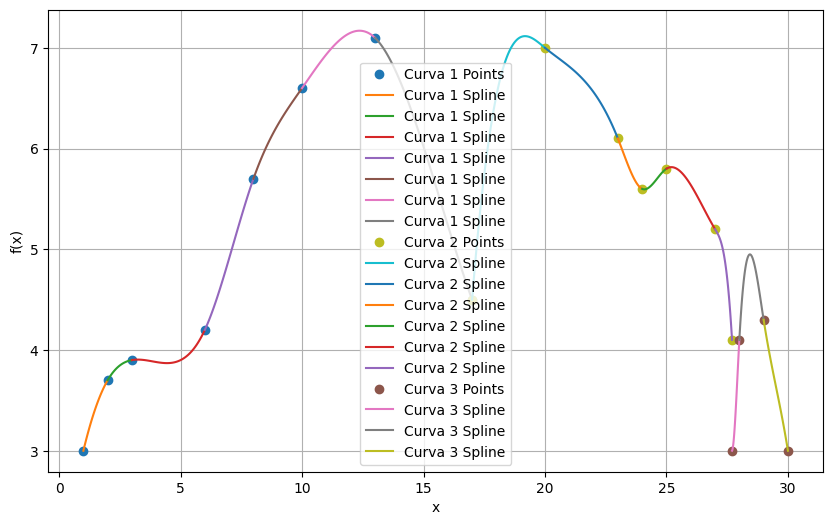

In [37]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# La función cubic_spline_clamped tal como se proporciona
def cubic_spline_clamped(xs, ys, d0, dn):
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

# Datos de la tabla
curves = {
    "Curva 1": {
        "x": [1, 2, 3, 6, 8, 10, 13, 17],
        "y": [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 4.5],
        "d0": 1.0,
        "dn": -0.67
    },
    "Curva 2": {
        "x": [17, 20, 23, 24, 25, 27, 27.7],
        "y": [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1],
        "d0": 3.0,
        "dn": -4.0
    },
    "Curva 3": {
        "x": [27.7, 28, 29, 30],
        "y": [3.0, 4.1, 4.3, 3.0],
        "d0": 0.33,
        "dn": -1.5
    }
}

# Datos
fig, ax = plt.subplots(figsize=(10, 6))

x = sym.Symbol("x")
for label, data in curves.items():
    xs = data["x"]
    ys = data["y"]
    d0 = data["d0"]
    dn = data["dn"]

    splines = cubic_spline_clamped(xs, ys, d0, dn)

    # Graficar puntos originales
    ax.plot(xs, ys, 'o', label=f'{label} Points')

    # Graficar las splines
    for S, (x0, x1) in zip(splines, zip(xs, xs[1:])):
        spline_func = sym.lambdify(x, S)
        x_vals = np.linspace(x0, x1, 100)
        y_vals = spline_func(x_vals)
        ax.plot(x_vals, y_vals, label=f'{label} Spline')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)
plt.show()